In [1]:
import numpy as np
import matplotlib.pyplot as plt

# FFT intro

In [2]:
sr = 32 # sample rate
t = np.linspace(0,1,sr,endpoint=False)
f0 = 5.0 # freq
A0 = 1.0 # amplitude

In [3]:
t

array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
       0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
       0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
       0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
       0.875  , 0.90625, 0.9375 , 0.96875])

In [4]:
g = A0*np.sin(2.*np.pi*f0*t)

Text(0, 0.5, 'g(t)')

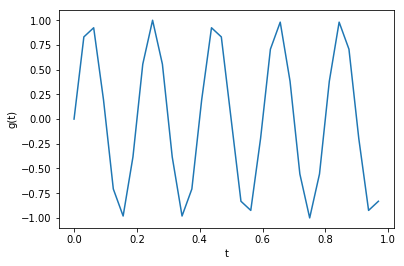

In [5]:
# Plot time series
plt.plot(t,g)
plt.xlabel("t")
plt.ylabel("g(t)")

In [6]:
G = np.fft.fft(g) # Fast Fourier Transform
f = np.fft.fftfreq(len(t),d=t[1]-t[0]) # Get the frequencies associated with FFT

I expect the Fourier transform to have a peak at f=5 Hz and be zero elsewhere, since the FT represents the amount of each frequency needed to construct a time series.

In [7]:
print ("G =", G)
print ("Number of samples =", len(G))

G = [-4.85552500e-15+0.00000000e+00j  1.55039312e-15-1.21603204e-15j
  6.04937785e-15-1.04206027e-15j -6.09419240e-16+7.01331647e-15j
 -2.35680527e-15+2.52272850e-15j -1.15463195e-14-1.60000000e+01j
 -2.10942963e-15-2.22300214e-15j  5.27046396e-16-6.01732567e-15j
  4.38708168e-15-1.94289029e-16j  1.91544426e-15+4.77479022e-16j
 -1.53321019e-15-4.57803602e-16j  1.77635684e-15-6.66133815e-16j
  2.47122904e-15-3.63851367e-16j -2.78759179e-16+6.85045234e-16j
  4.25555749e-17-6.09129362e-16j  4.48008326e-16-1.49358780e-15j
  7.51101278e-16+0.00000000e+00j  4.48008326e-16+1.49358780e-15j
  4.25555749e-17+6.09129362e-16j -2.78759179e-16-6.85045234e-16j
  2.47122904e-15+3.63851367e-16j  1.77635684e-15+6.66133815e-16j
 -1.53321019e-15+4.57803602e-16j  1.91544426e-15-4.77479022e-16j
  4.38708168e-15+1.94289029e-16j  5.27046396e-16+6.01732567e-15j
 -2.10942963e-15+2.22300214e-15j -1.15463195e-14+1.60000000e+01j
 -2.35680527e-15-2.52272850e-15j -6.09419240e-16-7.01331647e-15j
  6.04937785e-15+1.04

In [8]:
print ("f =", f)
print ("df =", f[1]-f[0])
print ("Number of samples =", len(f))

f = [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.
  -4.  -3.  -2.  -1.]
df = 1.0
Number of samples = 32


Note: Our frequency array is organized in the following way

f = [0, df, 2*df, ... , fNyqst-df, -f_Nyqst, -f_Nyqst+df, -f_Nyqst+2*df, ... , -2*df, -df]

Remember, f_Nyqst = sample rate / 2, which in this case is 16 Hz, since the sample rate is 32 Hz.

The first half of the samples are positive frequencies but exclude f_Nyqst - f = [0, df, ... , fNyqst-df]

The second half of the samples are negative frequencies but exclude 0 - f = [-f_Nyqst+df, -f_Nyqst+2*df, ... , -df]

The number of time series samples is n=32, and the number of frequency series samples is N=n.

Text(0, 0.5, 'G(f)')

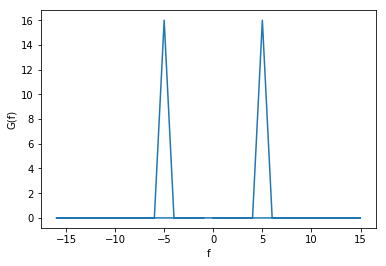

In [9]:
# Plot frequency series
plt.plot(f,np.abs(G))
plt.xlabel("f")
plt.ylabel("G(f)")

##### An IFFT recovers the original time series

In [10]:
g_ifft = np.fft.ifft(G)

In [11]:
print ("g_ifft =", g_ifft)

g_ifft = [-8.24163588e-17+0.00000000e+00j  8.31469612e-01+1.46402487e-32j
  9.23879533e-01+0.00000000e+00j  1.95090322e-01+4.59223108e-33j
 -7.07106781e-01-1.90484157e-17j -9.80785280e-01-1.33160970e-17j
 -3.82683432e-01+1.16393988e-17j  5.55570233e-01-1.92335764e-17j
  1.00000000e+00+0.00000000e+00j  5.55570233e-01-1.00116545e-32j
 -3.82683432e-01+0.00000000e+00j -9.80785280e-01+4.59223108e-33j
 -7.07106781e-01+1.90484157e-17j  1.95090322e-01+1.36044070e-17j
  9.23879533e-01-6.39183615e-18j  8.31469612e-01+2.97859912e-17j
  6.94739758e-16+0.00000000e+00j -8.31469612e-01+1.46402487e-32j
 -9.23879533e-01+0.00000000e+00j -1.95090322e-01+4.59223108e-33j
  7.07106781e-01+1.90484157e-17j  9.80785280e-01+1.33160970e-17j
  3.82683432e-01-1.16393988e-17j -5.55570233e-01+1.92335764e-17j
 -1.00000000e+00+0.00000000e+00j -5.55570233e-01-1.00116545e-32j
  3.82683432e-01+0.00000000e+00j  9.80785280e-01+4.59223108e-33j
  7.07106781e-01-1.90484157e-17j -1.95090322e-01-1.36044070e-17j
 -9.23879533e-01

Note: The recovered g_ifft is imaginary, though the imaginary part is nearly zero

In [12]:
np.sum(np.abs(np.imag(g_ifft)))

2.641362754213527e-16

Text(0, 0.5, 'recovered g(t)')

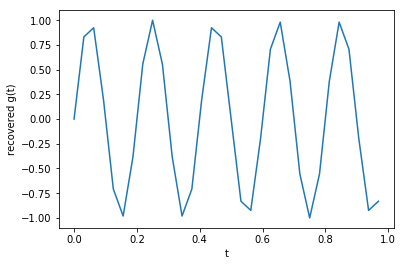

In [13]:
# Plot recovered time series
plt.plot(t,np.real(g_ifft))
plt.xlabel("t")
plt.ylabel("recovered g(t)")

# RFFT

In [14]:
G = np.fft.rfft(g) # Fast Fourier Transform for real input
f = np.fft.rfftfreq(len(t),d=t[1]-t[0]) # Get the frequencies associated with RFFT

In [15]:
print ("G =", G)
print ("Number of samples =", len(G))

G = [-4.85552500e-15+0.00000000e+00j  1.55039312e-15-1.21603204e-15j
  6.04937785e-15-1.04206027e-15j -6.09419240e-16+7.01331647e-15j
 -2.35680527e-15+2.52272850e-15j -1.15463195e-14-1.60000000e+01j
 -2.10942963e-15-2.22300214e-15j  5.27046396e-16-6.01732567e-15j
  4.38708168e-15-1.94289029e-16j  1.91544426e-15+4.77479022e-16j
 -1.53321019e-15-4.57803602e-16j  1.77635684e-15-6.66133815e-16j
  2.47122904e-15-3.63851367e-16j -2.78759179e-16+6.85045234e-16j
  4.25555749e-17-6.09129362e-16j  4.48008326e-16-1.49358780e-15j
  7.51101278e-16+0.00000000e+00j]
Number of samples = 17


In [16]:
print ("f =", f)
print ("df =", f[1]-f[0])
print ("Number of samples =", len(f))

f = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
df = 1.0
Number of samples = 17


Note: Our frequency array is organized in the following way

f = [0, df, 2*df, ... , fNyqst-df, f_Nyqst]

The number of time series samples is n=32, and the number of frequency series samples is N=(n/2)+1.

Text(0, 0.5, 'G(f)')

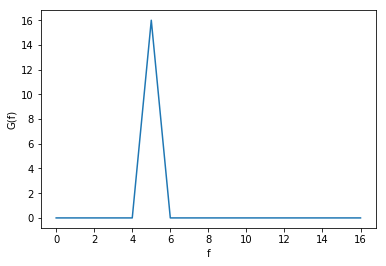

In [17]:
# Plot frequency series
plt.plot(f,np.abs(G))
plt.xlabel("f")
plt.ylabel("G(f)")

##### Recover time series

In [18]:
g_irfft = np.fft.irfft(G)

In [19]:
print ("g_ifft =", g_irfft)

g_ifft = [-1.37927510e-16  8.31469612e-01  9.23879533e-01  1.95090322e-01
 -7.07106781e-01 -9.80785280e-01 -3.82683432e-01  5.55570233e-01
  1.00000000e+00  5.55570233e-01 -3.82683432e-01 -9.80785280e-01
 -7.07106781e-01  1.95090322e-01  9.23879533e-01  8.31469612e-01
  7.50250910e-16 -8.31469612e-01 -9.23879533e-01 -1.95090322e-01
  7.07106781e-01  9.80785280e-01  3.82683432e-01 -5.55570233e-01
 -1.00000000e+00 -5.55570233e-01  3.82683432e-01  9.80785280e-01
  7.07106781e-01 -1.95090322e-01 -9.23879533e-01 -8.31469612e-01]


Note: The recovered g(t) is purely real!

Text(0, 0.5, 'recovered g(t)')

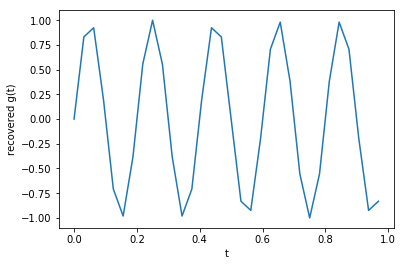

In [20]:
# Plot recovered time series
plt.plot(t,g_irfft)
plt.xlabel("t")
plt.ylabel("recovered g(t)")

# RFFT with different sample rate

In [21]:
sr = 1024
t = np.linspace(0,1,sr,endpoint=False)
g = A0*np.sin(2.*np.pi*f0*t)
G = np.fft.rfft(g)
f = np.fft.rfftfreq(len(t),d=t[1]-t[0])

Text(0, 0.5, 'g(t)')

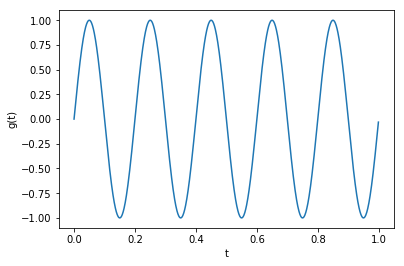

In [22]:
plt.plot(t,g)
plt.xlabel("t")
plt.ylabel("g(t)")

Text(0, 0.5, 'G(f)')

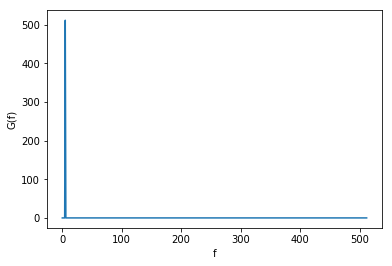

In [23]:
plt.plot(f,np.abs(G))
plt.xlabel("f")
plt.ylabel("G(f)")

Note: The frequency series goes to much higher frequencies, since f_Nyqst = sample_rate/2.  In this case, it's 512 Hz, since the sample rate is 1024 Hz.

Text(0, 0.5, 'G(f)')

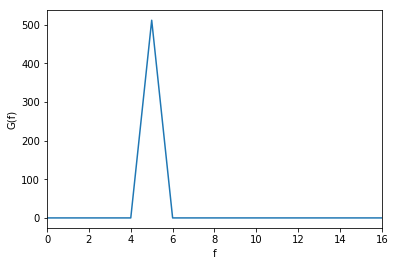

In [24]:
plt.plot(f,np.abs(G))
plt.xlim([0,16])
plt.xlabel("f")
plt.ylabel("G(f)")

##### Recover time series

In [25]:
g_irfft = np.fft.irfft(G)

Text(0, 0.5, 'recovered g(t)')

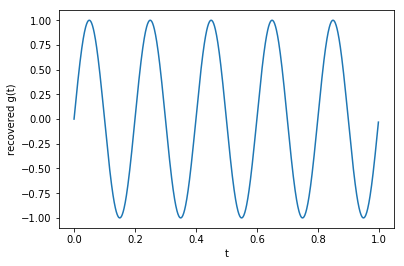

In [26]:
# Plot recovered time series
plt.plot(t,g_irfft)
plt.xlabel("t")
plt.ylabel("recovered g(t)")

# RFFT with more than one frequency

In [27]:
sr = 1024
A0 = 1.0
f0 = 5.0
A1 = 3.0
f1 = 10.0
t = np.linspace(0,1,sr,endpoint=False)
g = A0*np.sin(2.*np.pi*f0*t)+A1*np.sin(2.*np.pi*f1*t)
G = np.fft.rfft(g)
f = np.fft.rfftfreq(len(t),d=t[1]-t[0])

Text(0, 0.5, 'g(t)')

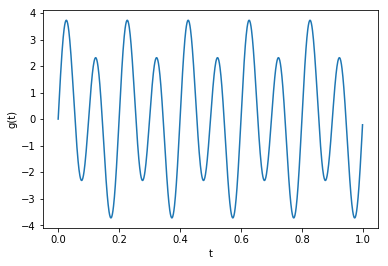

In [28]:
plt.plot(t,g)
plt.xlabel("t")
plt.ylabel("g(t)")

Text(0, 0.5, 'G(f)')

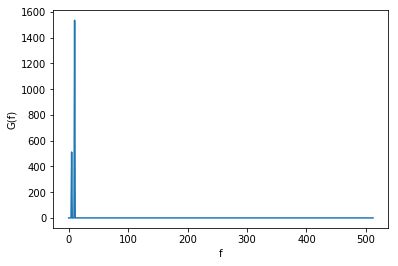

In [29]:
plt.plot(f,np.abs(G))
plt.xlabel("f")
plt.ylabel("G(f)")

Text(0, 0.5, 'G(f)')

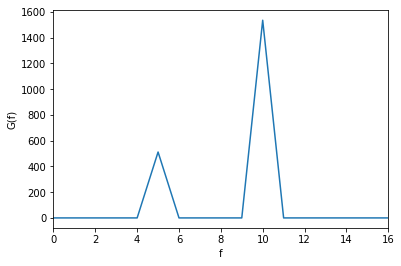

In [30]:
plt.plot(f,np.abs(G))
plt.xlim([0,16])
plt.xlabel("f")
plt.ylabel("G(f)")

Note that the 10 Hz peak is 3 times as high as the 5 Hz peak.

##### Recover time series

In [31]:
g_irfft = np.fft.irfft(G)

Text(0, 0.5, 'recovered g(t)')

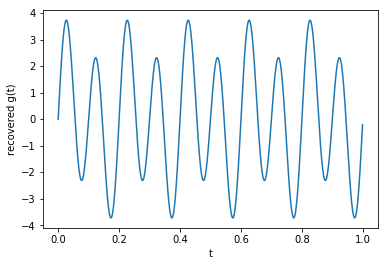

In [32]:
# Plot recovered time series
plt.plot(t,g_irfft)
plt.xlabel("t")
plt.ylabel("recovered g(t)")